In [ ]:
import pandas as pd #this helps in read the dataset
import matplotlib.pyplot as plt #for visuailization purpose
import numpy as np
%matplotlib inline

In [ ]:
df = pd.read_csv('Salary_Data.csv')
print("Successfully data is being read")
df.head()#for displaying the data

Successfully data is being read


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


Text(0, 0.5, 'Salary')

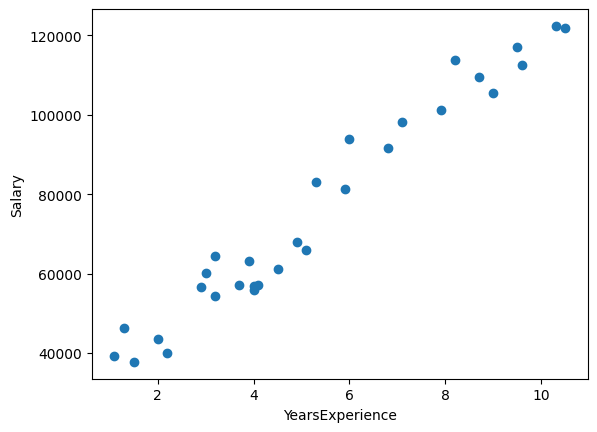

In [ ]:
##scatter plot which defines the scattering plot of the guven data
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

<Axes: xlabel='YearsExperience', ylabel='Salary'>

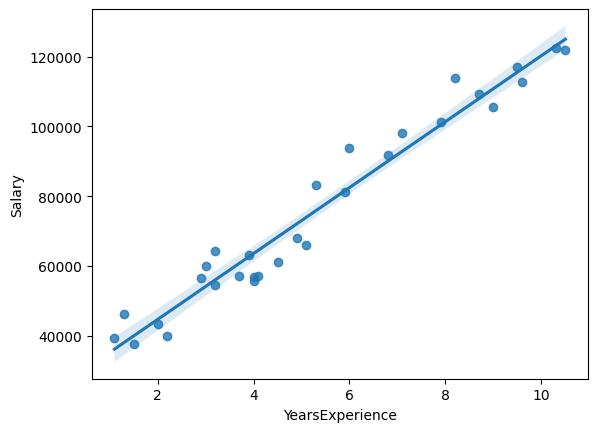

In [ ]:
#seaborn lib is used for visualization of data
import seaborn as sns
sns.regplot(x='YearsExperience',y='Salary',data=df)
#regplot actually function from seaborn which creates the regression plot.here for visulas of yearsofexperience and salary.the line is called regression line & shaded area representing the confindence interval around the line.


In [ ]:
#correlation
#if x increases w.r.t y then correaltion is +ve
#if x increases and y decreases or vice versa then it is -ve
#otherwise no correlation
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [ ]:
#dividing the features into independent and dependent
x=df[['YearsExperience']]
y=df['Salary']
np.array(x).shape
#here 30 rows and 1 col

(30, 1)

In [ ]:
#train test split trained data will be using for testing
from sklearn.model_selection import train_test_split
x_train,X_test,y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=101)


In [ ]:
x_train.shape
y_train.shape
X_test.shape
Y_test.shape

(8,)

In [ ]:
##standardisation
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
X_test=sc.transform(X_test)
#why do we use fit_transformation :because to avoid the data leakage or training data should not be exposed to test data
#here it transforms the data to mean to 0 and sd = 1

In [ ]:
#apply simple linear regression
from sklearn.linear_model import LinearRegression


In [ ]:
regression=LinearRegression(n_jobs=-1)
regression.fit(x_train,y_train)
#n_jobs=-1 tells model to use all available cpu cores for computation
#this can potentially increases the speed of the training of dataset
#specially for larger dataset to perform calculations in parllel
#if n_jobs=1 means using only one cpu for computations

LinearRegression(n_jobs=-1)

for finding the coefficient and intercept

In [ ]:
regression.coef_
#it gives the coefficient
#y=a0+a1*x;
#a1=coefficient

print("coefficient or slope:",regression.coef_)#a1
print("Intercept:",regression.intercept_)#a0


coefficient or slope: [25527.43522381]
Intercept: 73170.40909090909


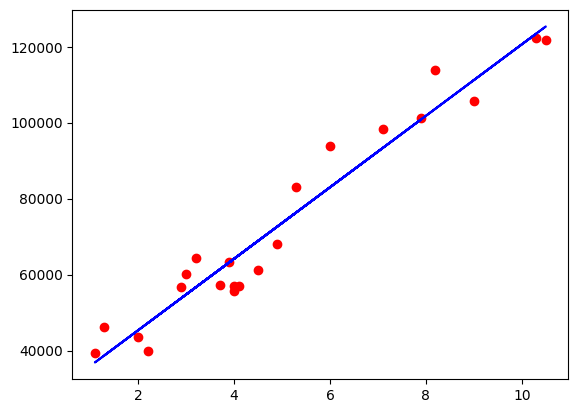

In [ ]:
##ploting training data plot best fit line

plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regression.predict(x_train),color='blue')

In [ ]:
#prediction for the test data
regression.predict(X_test)
#predicted salary = intercept+coef_ * yearsofexperience

array([ 90498.22864751, 108382.24981952,  56612.71484793,  82026.85019762,
        40611.22222035, 116853.62826941, 115912.3639972 ,  74496.73601993])

In [ ]:
#performance matrix:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
mse=mean_squared_error(Y_test,regression.predict(X_test))
mae=mean_absolute_error(Y_test,regression.predict(X_test))
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

13336016.519261394
2717.9136363764037
3651.8511085833434


In [ ]:
#finding r**2 value

# r^2 = 1 - ssR = sum of squares of residuals /ssT=total sum ofsquares
from sklearn.metrics import r2_score
score=r2_score(Y_test,regression.predict(X_test))
print("r2_score:",score)

r2_score: 0.9820915410004406


In [ ]:
# adjusted r^2
# 1-[(1-r^2)*(n-1)/(n-p-1)]
adjscore=1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

In [ ]:
print(adjscore)

1.0


In [ ]:
#OLS Linear Regression

import statsmodels.api as sm
model =sm.OLS(y_train,x_train).fit()
prediction=model.predict(X_test)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              614.4
Date:                Sat, 20 Sep 2025   Prob (F-statistic):                    4.94e-17
Time:                        19:20:09   Log-Likelihood:                         -241.45
No. Observations:                  22   AIC:                                      484.9
Df Residuals:                      21   BIC:                                      486.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  1.352e+04    545.624     24.788      0.000    1.24e+04    1.47e+04
==============================================================================
Omnibus:                        0.712   Durbin-Watson:                   1.195
Prob(Omnibus):                  0.700   Jarque-Bera (JB):                0.647
Skew:                          -0.368   Prob(JB):                        0.724
Kurtosis:                       2.594   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#prediction of new data
sc.fit(x_train) # Fit the scaler on the training data
regression.predict(sc.transform([[50000]]))

array([1.27644493e+09])